In [31]:
# loading necessary libraries
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from src.PostAnalysis import BinSamples

# fixing global variables
plt.style.use("bmh")
rcParams["figure.figsize"] = (16, 8)
n, m, n_param, v, N = 4, 4, 5, 0, 10000
data_path = "data/n{}_m{}_nparam{}_v{}".format(n, m, n_param, v)

## Boson Sampling using _fock_ backend
### Architecture
The architecture of the Boson Sampler (BS) used throughout this study is as follows

<p align="center">
<img src="figs/architecture.png"
     alt="Markdown Monster icon"/>
</p>

It has four modes and four photons enter from the left side (shown in red circles). The Beam splitters are shown in yellow rectangles and have their transmittivity $\theta$ set is to $\pi/4$ and phase angle $\phi$ to $0$. The photodetectors are shown as blue semi-circles on the right hand side.

The exact solution of the probabilities of the fock states for the BS shown above is depicted in the following bar plot.

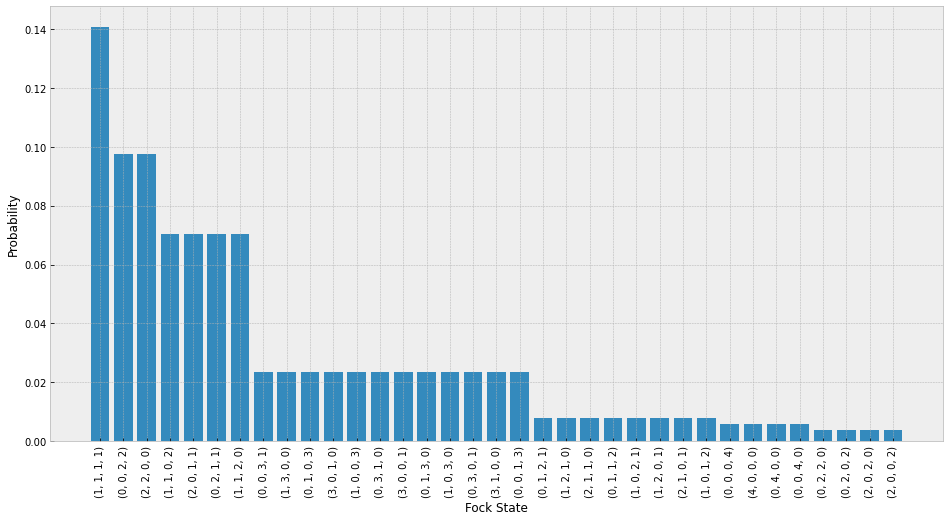

In [27]:
with open("{}/exact_result.json".format(data_path), "r") as f:
    fock_dist = json.load(f)

plt.bar(list(fock_dist.keys()), list(fock_dist.values()))
plt.ylabel("Probability")
plt.xlabel("Fock State")
plt.xticks(rotation=90);

### Von Neumann Post-Processing
The von Neumann debiasing discussed in [[1]](https://arxiv.org/abs/2206.02292) takes two sampled fock states and convert them to two binary states e.g. take two fock states _(0, 2, 0, 2)_ and _(0, 0, 0, 4)_, their binary representations are _(0, 1, 0, 1)_ and _(0, 0, 0, 1)_ respectively. Then elementwise, apply the following protocol 

bit 1 | bit 2 | output
----- | ----- | ------
  0   |   0   |   *
  0   |   1   |   0
  1   |   0   |   1
  1   |   1   |   *

Where _*_ stands on discarded. Hence for the two fock states above, the extracted binary string yields _\*1\*\*_ which simplifies to _1_. After measuring the BS $10^4$ and recording the binary strings after the von Neumann debiasing the following histogram is yielded.

<BarContainer object of 28 artists>

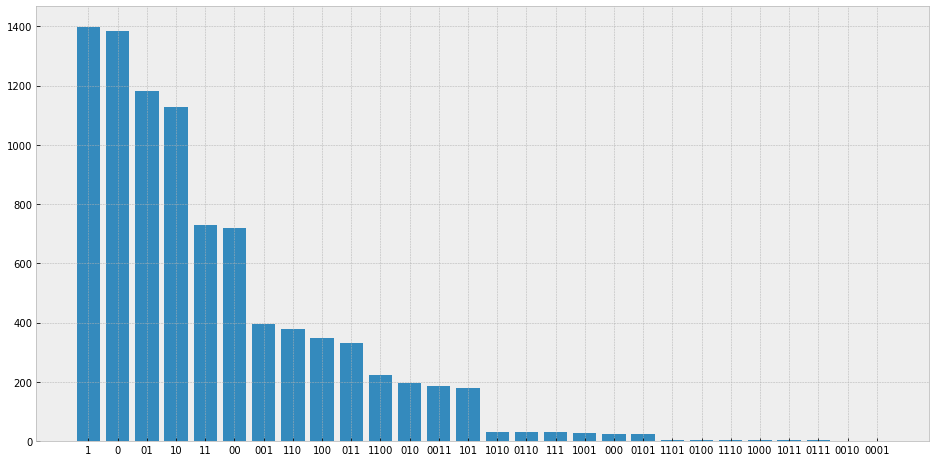

In [36]:
with open("{}/vonneumann_strs_N{}.json".format(data_path, N)) as f:
    von_neumann_strs = json.load(f)
occurrences = Counter(von_neumann_strs)
occurrences = [(key, val) for key, val in occurrences.items()]
occurrences.sort(key=lambda x: x[1], reverse=True)
occurrences = {el[0]: el[1] for el in occurrences}
plt.bar(list(occurrences.keys()), list(occurrences.values()))

A contineous stream of these binary strings which is yielded by concatenating them consequtively, is supposed to produce an unbiased appearance of the bits _0_ and _1_ i.e. the number of _0_'s is as much as the number of _1_'s in the string when the length of the stream tends to infinity.

In [ ]:
neumann_samp = BinSamples(von_neumann_strs)
trunc_indices = range(10, len(von_neumann_strs), 10)
neumann_ratio = neumann_samp.truncated_ensemble(trunc_indices=trunc_indices)

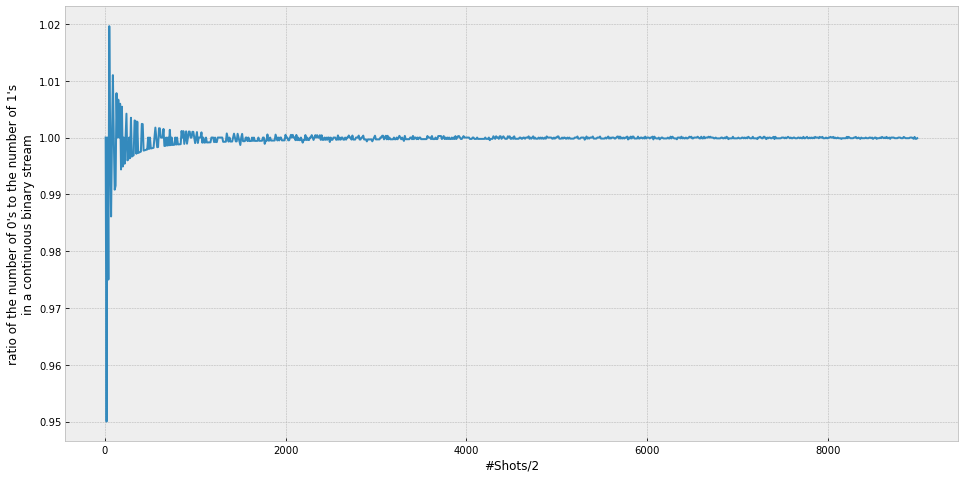

In [49]:
zero_one_diff = [abs(neumann_ratio[key]["ratio"]["0"]/neumann_ratio[key]["ratio"]["1"]) for key in neumann_ratio.keys()]
plt.plot(list(neumann_ratio.keys()), zero_one_diff)
plt.ylabel("ratio of the number of 0's to the number of 1's\nin a continuous binary stream")
plt.xlabel("#Shots/2");

As demonstrated in the figure above, it is easy to verify that the number of _0_'s in a continuous stream of binary stream as as high as the number of _1_'s within the same stream.

In [61]:
%%sh
cat data/n4_m4_nparam5_v0/huffman_strs_N10000.json | grep -Po '^(.*?,){2000}' | sed 's/[\[, "]//g' | djent -l 1

   Min Entropy (by max occurrence of symbol 0) = 0.193723
   Analysing 35016 1-bit symbols
   Shannon IID Entropy = 0.545396 bits per symbol
   Optimal compression would compress by 45.460445 percent
   Chi square: symbol count=35017, distribution=19628.50, randomly exceeds 0.00 percent of the time
   Mean = 0.125657
   Monte Carlo value for Pi is 4.000000 (error 27.32 percent).
   Serial Correlation = -0.143716
   Longest Run Symbol = 0. Run Length = 51
   Probabilty of longest run being <= 51 = 1.000000
   Position of Longest Run = 330 (0x14a). Byte position 41 (0x29)


In [55]:
%%sh
cat data/n4_m4_nparam5_v0/vonneumann_strs_N10000.json | grep -Po '^(.*?,){4000}' | sed 's/[\[, "]//g' | djent -l 1

   Min Entropy (by max occurrence of symbol 0) = 0.192639
   Analysing 32568 1-bit symbols
   Shannon IID Entropy = 0.543554 bits per symbol
   Optimal compression would compress by 45.644633 percent
   Chi square: symbol count=32569, distribution=18320.44, randomly exceeds 0.00 percent of the time
   Mean = 0.125000
   Monte Carlo value for Pi is 4.000000 (error 27.32 percent).
   Serial Correlation = -0.142857
   Longest Run Symbol = 0. Run Length = 19
   Probabilty of longest run being <= 19 = 0.969425
   Position of Longest Run = 2 (0x2). Byte position 0 (0x0)


### Huffman Encoding Post-Processing

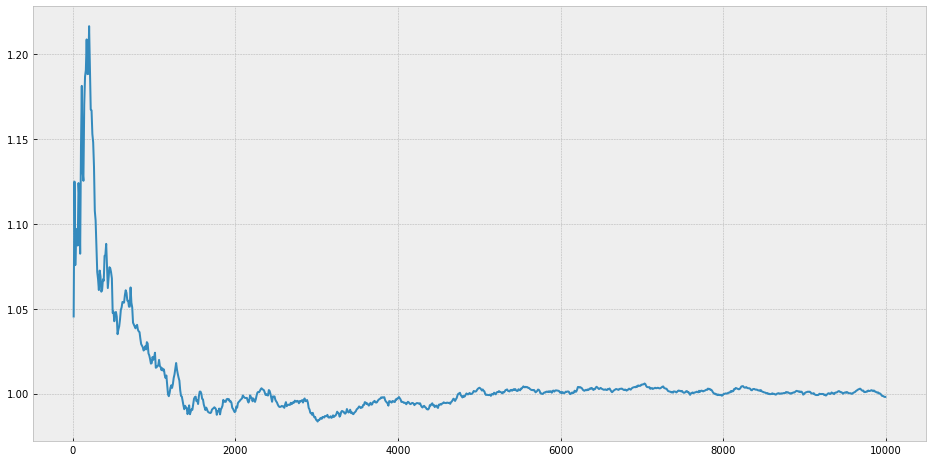

In [47]:
zero_one_diff = [abs(huffman_ratio[key]["ratio"]["0"]/huffman_ratio[key]["ratio"]["1"]) for key in huffman_ratio.keys()]
plt.plot(list(huffman_ratio.keys()), zero_one_diff)

In [18]:
len(huffman_strs)

10000

In [19]:
len(von_neumann_strs)

8991